In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('tips.csv')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
sns.set(
    rc={'figure.figsize': (9, 6)}
)

Distribution plot:

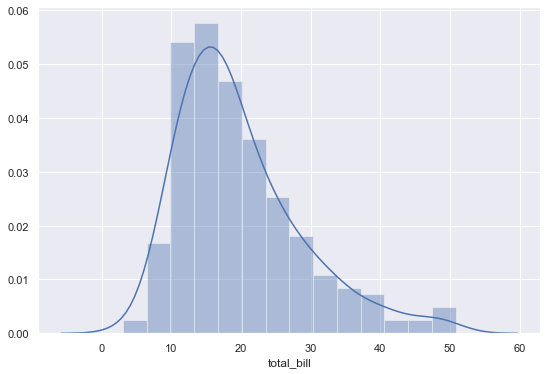

In [5]:
sns.distplot(df['total_bill'])
plt.show()

Joint distribution plot:

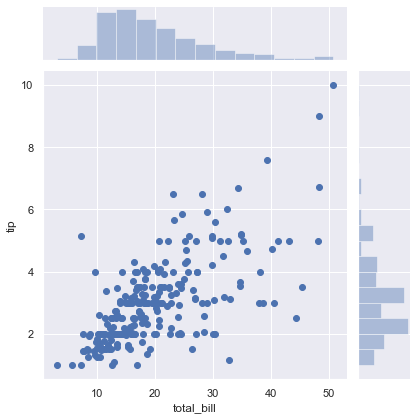

In [6]:
sns.jointplot(x='total_bill', y='tip', data=df)
plt.show()

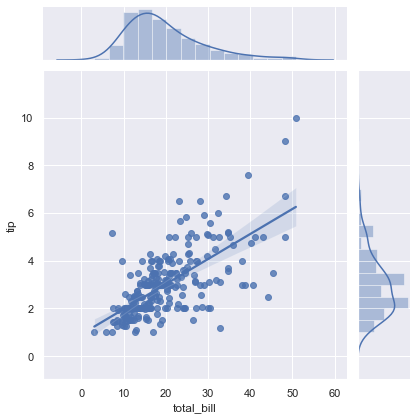

In [7]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')
plt.show()

Distribution density:

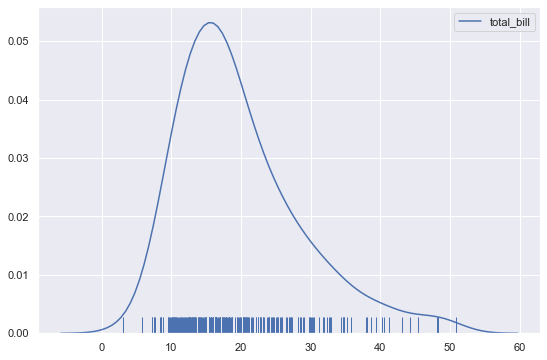

In [8]:
sns.kdeplot(df['total_bill'])
sns.rugplot(df['total_bill'])
plt.show()

Pair plots:

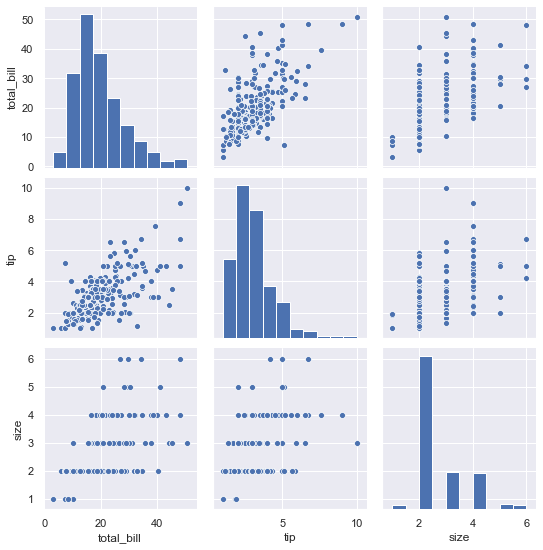

In [9]:
sns.pairplot(df)
plt.show()

Pair plots by group:

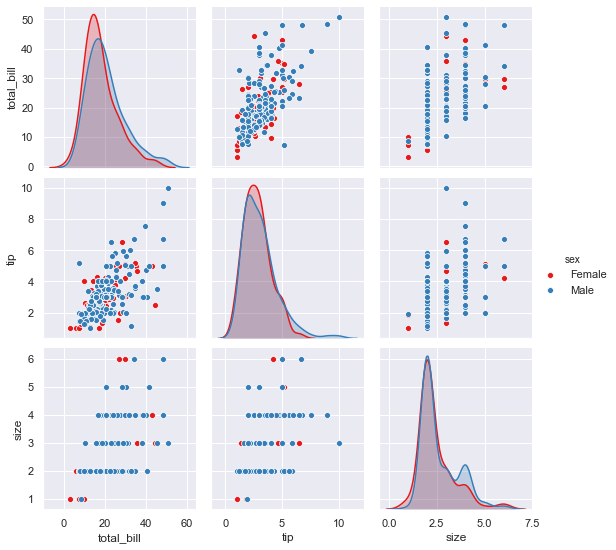

In [10]:
sns.pairplot(df, hue='sex', palette='Set1')
plt.show()

Grid of pairs:

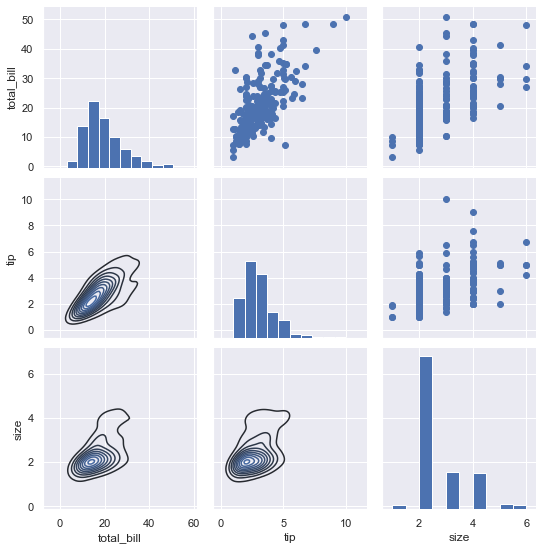

In [11]:
fig = sns.PairGrid(df)
fig.map_diag(plt.hist)
fig.map_upper(plt.scatter)
fig.map_lower(sns.kdeplot)
plt.show()

Facet grid:

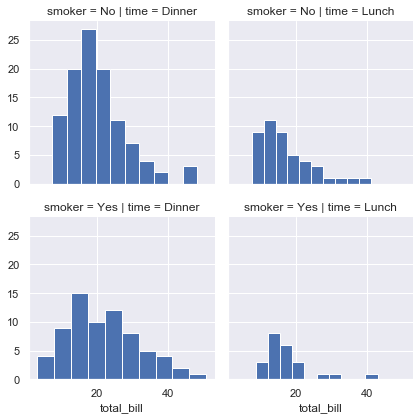

In [12]:
fig = sns.FacetGrid(df, col='time', row='smoker')
fig = fig.map(plt.hist, 'total_bill')
plt.show()

Plots for categorical data:

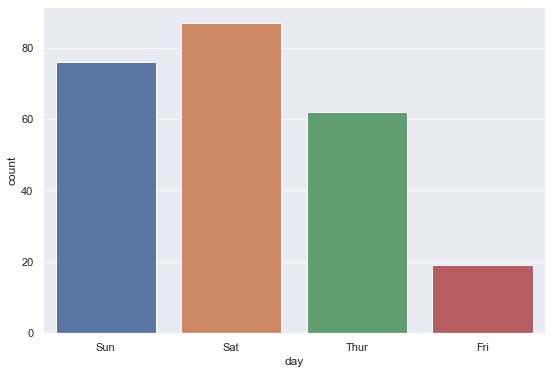

In [13]:
sns.countplot(x='day', data=df)
plt.show()

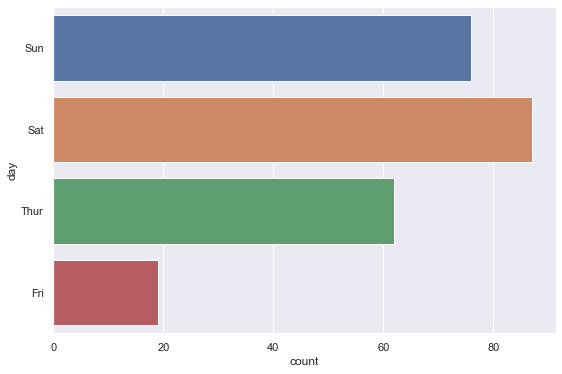

In [14]:
sns.countplot(y='day', data=df)
plt.show()

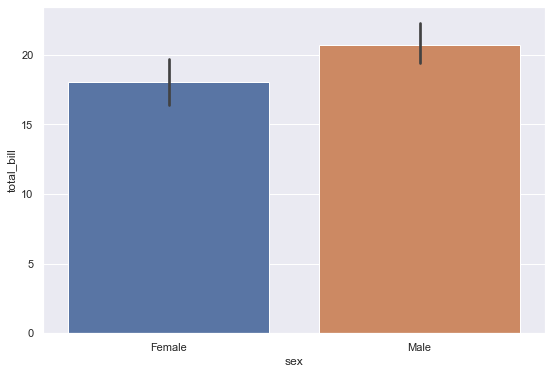

In [15]:
sns.barplot(x='sex', y='total_bill', data=df)
plt.show()

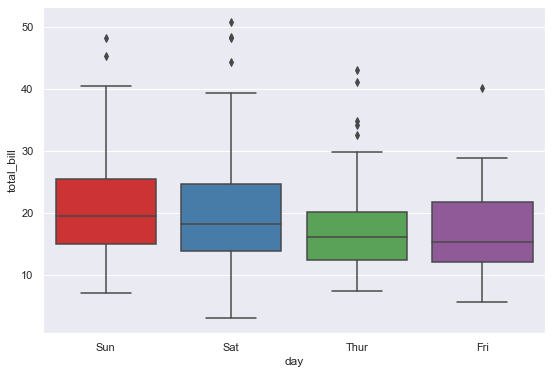

In [16]:
sns.boxplot(x='day', y='total_bill', data=df, palette='Set1')
plt.show()

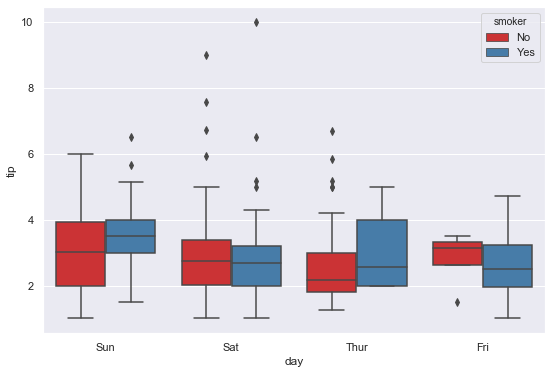

In [17]:
sns.boxplot(x='day', y='tip', hue='smoker', data=df, palette='Set1')
plt.show()

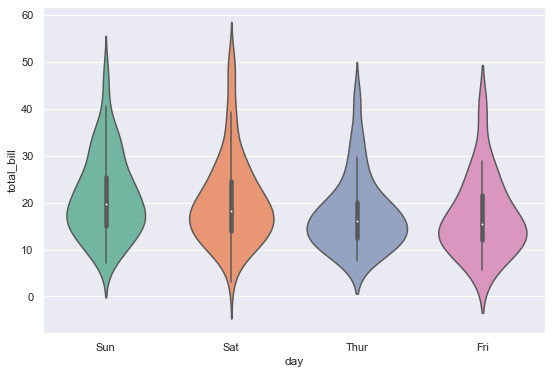

In [18]:
sns.violinplot(x='day', y='total_bill', data=df, palette='Set2')
plt.show()

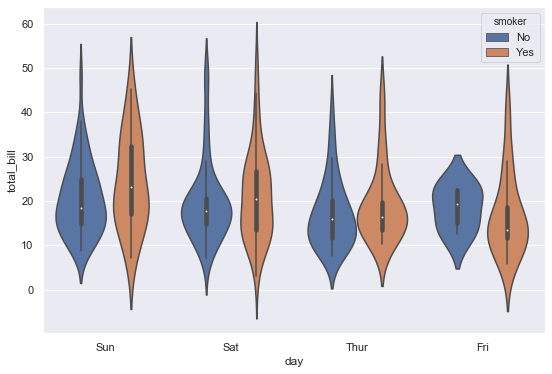

In [19]:
sns.violinplot(x='day', y='total_bill', hue='smoker', data=df)
plt.show()

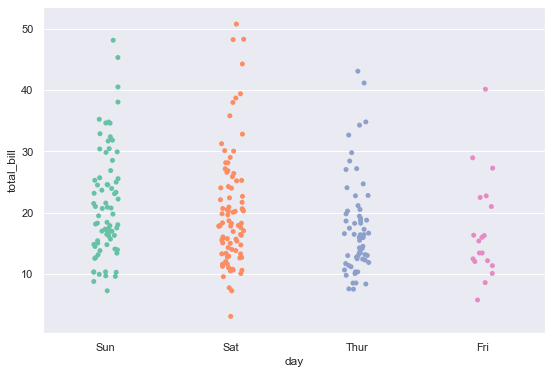

In [20]:
sns.stripplot(x='day', y='total_bill', palette='Set2', data=df)
plt.show()

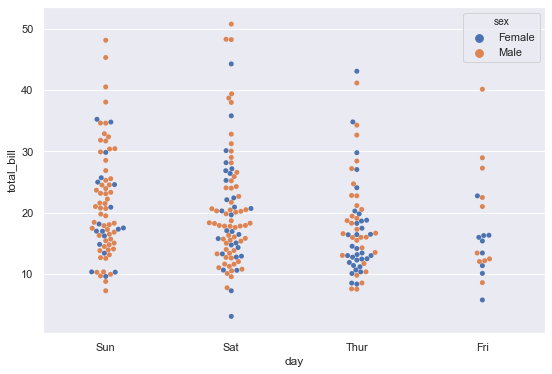

In [21]:
sns.swarmplot(x='day', y='total_bill', hue='sex', data=df)
plt.show()

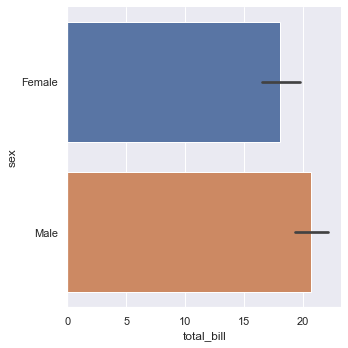

In [22]:
sns.catplot(x='total_bill', y='sex', data=df, kind='bar')
plt.show()

Table plots:

In [23]:
cor_df = df.corr()

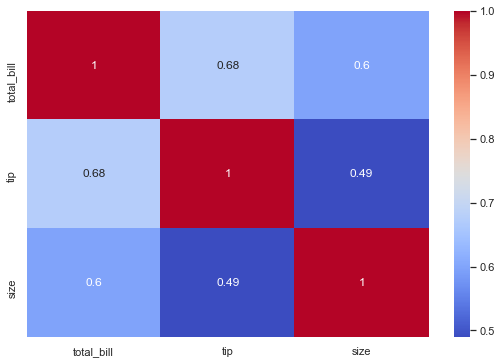

In [24]:
sns.heatmap(cor_df, annot=True, cmap='coolwarm')
plt.show()

Using seaborn with matplotlib:

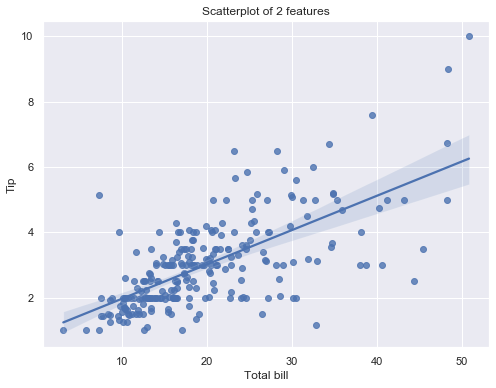

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot('total_bill', 'tip', data=df, ax=ax)
ax.set_title('Scatterplot of 2 features')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

In [26]:
def cnvrt(x):
    if x == 'Fri':
        return 5
    if x == 'Sat':
        return 6
    if x == 'Sun':
        return 7
    else:
        return 0
    
df['numd'] = df.day.apply(cnvrt)
df.sort_values(by='numd', inplace=True)

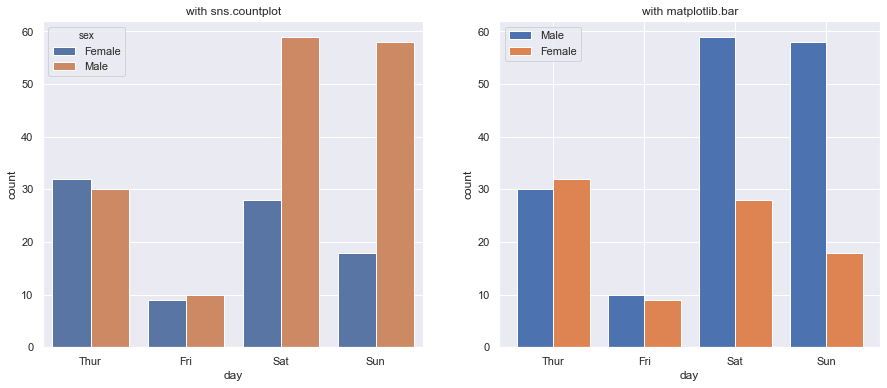

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='day', hue='sex', data=df, ax=ax[0])
ax[0].set_title('with sns.countplot')

grp = df.groupby(['day', 'sex']).tip.count().reset_index()
grp['numd'] = grp.day.apply(cnvrt)
grp.sort_values(by='numd', inplace=True)
xticks = grp.day.unique()
x = np.arange(len(xticks))
width = 0.4
ax[1].set_xticks(x)
ax[1].set_xticklabels(xticks)
ax[1].set_xlabel('day')
ax[1].set_ylabel('count')
ax[1].bar(x - width / 2, grp.query('sex == "Male"').tip, width, label='Male')
ax[1].bar(x + width / 2, grp.query('sex == "Female"').tip, width, label='Female')
ax[1].set_title('with matplotlib.bar')
ax[1].legend()

plt.show()

### Tasks

In [28]:
df = pd.read_csv('tips.csv')

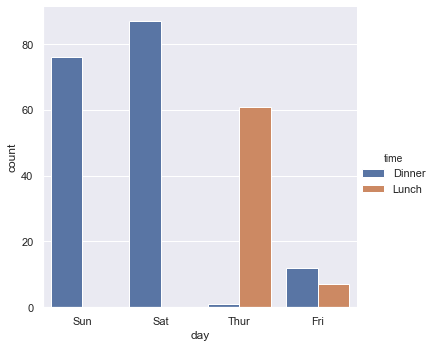

In [29]:
sns.catplot(x='day', hue='time', data=df, kind='count')
plt.show()

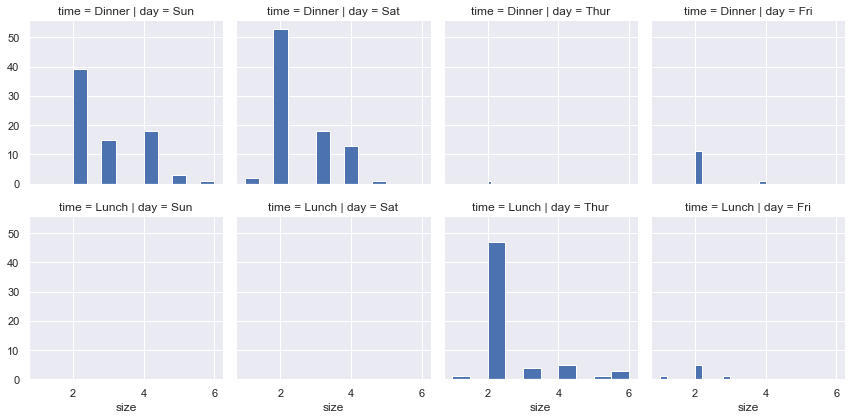

In [30]:
fig = sns.FacetGrid(df, col='day', row='time')
fig = fig.map(plt.hist, 'size')
plt.show()

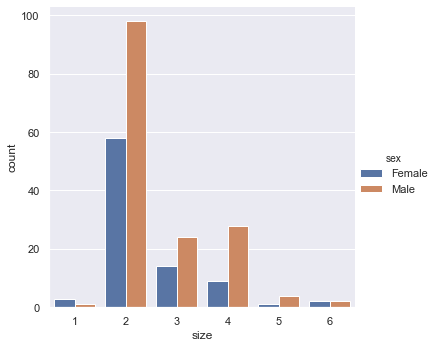

In [31]:
sns.catplot(x='size', hue='sex', data=df, kind='count')
plt.show()

In [32]:
dft = sns.load_dataset('titanic')
dft.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


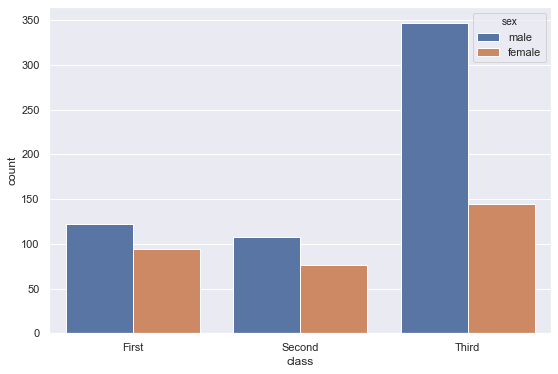

In [33]:
sns.countplot(x='class', hue='sex', data=dft)
plt.show()

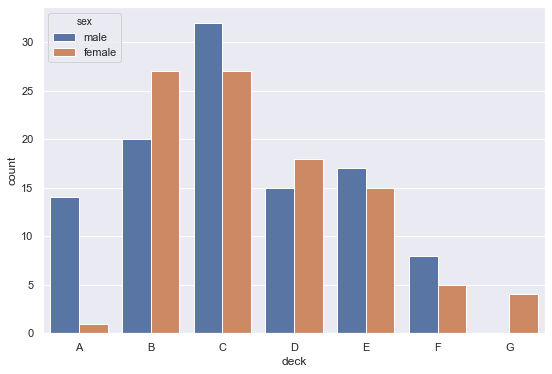

In [34]:
sns.countplot(x='deck', hue='sex', data=dft)
plt.show()

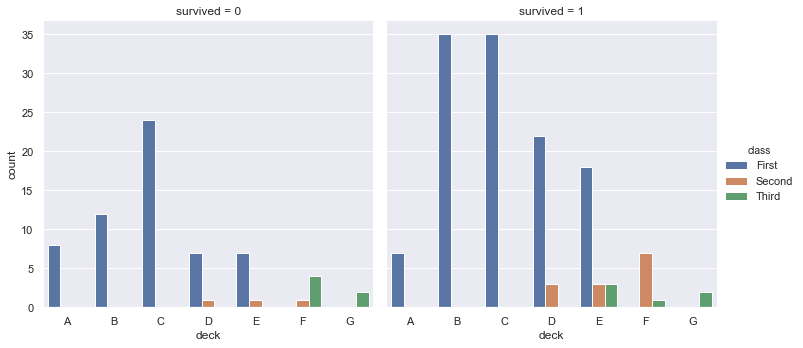

In [35]:
sns.catplot(x='deck', hue='class', col='survived', data=dft, kind='count')
plt.show()